# BUSINESS CASE : To

## Domain Analysis

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
fifa=pd.read_csv("players_20.csv")

#### Basic Checks

In [3]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
fifa.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [7]:
#Wage_eur and value_eur are having a zero value as a minimum. checl players with 0 value in value and wage.

In [8]:
fifa.describe(include="O")

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [9]:
fifa.shape

(18278, 104)

In [10]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

## Exploratory Data Analysis

In [11]:
#Step 1 Univariate Analysis :# Aanalyzing features - visualization

Question : Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [12]:
#Analyzing Nationality
fifa["nationality"].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

In [13]:
fifa["nationality"].value_counts()[0:10]  #Display 10 countries with most players in ascending order

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [14]:
list(fifa["nationality"].value_counts()[0:10].keys())

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands']

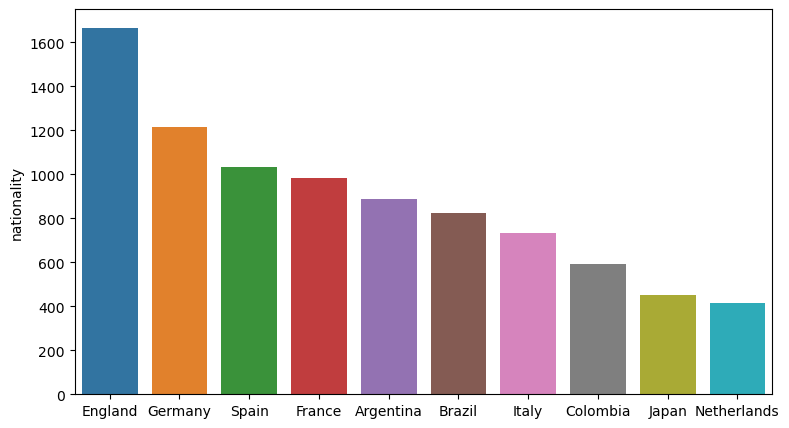

In [15]:

plt.figure(figsize=(9,5))
sns.barplot(x = list(fifa["nationality"].value_counts()[0:10].keys()), y=fifa["nationality"].value_counts()[0:10], data=fifa)
plt.show()

The countries with most players are shown in the grave above. Here the data : 
* England        1667
* Germany        1216
* Spain          1035
* France          984
* Argentina       886
* Brazil          824
* Italy           732
* Colombia        591
* Japan           453
* Netherlands     416

In [17]:
players_salary=fifa[['short_name','wage_eur']]

In [18]:
players_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [19]:
players_salary=players_salary.sort_values(by=['wage_eur'], ascending=False)

In [20]:
players_salary.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


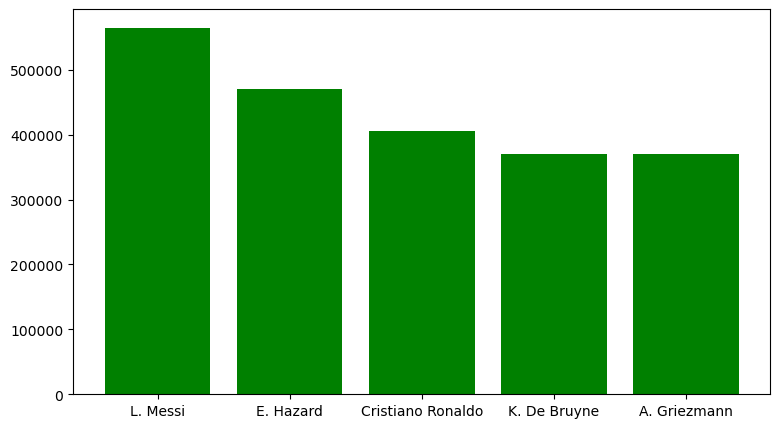

In [21]:
plt.figure(figsize=(9,5))
plt.bar(list(players_salary['short_name'])[0:5], list(players_salary['wage_eur'])[0:5], color="g")
plt.show()

In [22]:
# Step 2 Bivariate Analysis

In [23]:
## Step 3 Multivariate Analysizing

## Data Preprocessing and Feature Engineering

In [24]:
# Step 1-Finding missing values

In [25]:
#Step 2- Converting categorical data to numerical

In [26]:
# Step 3 Checking the outlier

In [27]:
# Step 4 Scaling the continous variable

In [28]:
# Step 5 Transformation

In [29]:
# Step 6 Balacing the data *for classification task only

## Feature Selection

In [30]:
#Step 1 Dropping the unwanted variables

In [31]:
## Step 2 Checking the correlation

## Model Creation

In [32]:
#Step 1 Independent and dependent variable creation

In [33]:
# Step 2 Traning and testing data creation

In [34]:
# Step 3 Creating model

In [35]:
# Step 4 Model Evalution

# Hyper Tuning Parameter

In [36]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [37]:

fifa = fifa[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [38]:
fifa.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8


In [39]:
fifa = fifa[fifa.overall > 86] # extracting players with overall above 86
fifa

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,...,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,...,77,91,38,43,41,14,14,9,11,14


In [40]:
pd.set_option('display.max_rows', 70)
fifa.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          21
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     45
gk_handling                   45
gk_kicking                    45
gk_reflexes                   45
gk_speed                      45
gk_positioning                45
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

Replace null values with mean

In [41]:
fifa.mean() #gives the mean of each column

age                           2.916364e+01
height_cm                     1.823636e+02
weight_kg                     7.838182e+01
overall                       8.854545e+01
potential                     8.932727e+01
value_eur                     5.601818e+07
wage_eur                      2.326364e+05
international_reputation      3.509091e+00
weak_foot                     3.454545e+00
skill_moves                   3.000000e+00
release_clause_eur            1.070327e+08
team_jersey_number            9.963636e+00
contract_valid_until          2.021836e+03
nation_jersey_number          8.529412e+00
pace                          7.548889e+01
shooting                      7.466667e+01
passing                       7.884444e+01
dribbling                     8.197778e+01
defending                     6.133333e+01
physic                        7.377778e+01
gk_diving                     8.750000e+01
gk_handling                   8.510000e+01
gk_kicking                    8.000000e+01
gk_reflexes

In [42]:
fifa = fifa.fillna(fifa.mean())

In [43]:
fifa.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [44]:
names = fifa.short_name.tolist() # saving names for later
names[0:5]

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'J. Oblak', 'E. Hazard']

In [45]:
fifa = fifa.drop(['short_name'], axis = 1) # drop the short_name column 

In [46]:
fifa.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


Normalize (rescale) the data

In [47]:
"""from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data=scaler.fit_transform(fifa)

data""""""

SyntaxError: incomplete input (2701598610.py, line 6)

In [48]:
from sklearn import preprocessing

x = fifa.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled, columns= fifa.columns)  #transform the 1D array into 2D Array

In [49]:
x_scaled

array([[0.85714286, 0.19444444, 0.35135135, ..., 0.14285714, 0.11627907,
        0.05617978],
       [1.        , 0.66666667, 0.64864865, ..., 0.14285714, 0.11627907,
        0.08988764],
       [0.5       , 0.33333333, 0.24324324, ..., 0.14285714, 0.12790698,
        0.08988764],
       ...,
       [0.57142857, 0.30555556, 0.2972973 , ..., 0.05494505, 0.05813953,
        0.11235955],
       [0.85714286, 0.61111111, 0.56756757, ..., 0.8021978 , 0.90697674,
        0.97752809],
       [0.57142857, 0.        , 0.        , ..., 0.13186813, 0.05813953,
        0.07865169]])

In [50]:
X_norm

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,...,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,...,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,...,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,...,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,...,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,...,0.860759,0.838710,0.670886,0.585366,0.524390,0.137931,0.112360,0.032967,0.069767,0.112360
6,0.500000,0.666667,0.702703,0.428571,0.750,0.563218,0.307692,0.333333,0.75,0.00,...,0.177215,0.161290,0.126582,0.036585,0.024390,0.977011,0.921348,0.945055,0.976744,0.977528
7,0.500000,0.833333,0.891892,0.428571,0.500,0.683908,0.197802,0.333333,0.50,0.25,...,0.645570,0.774194,0.962025,1.000000,0.939024,0.114943,0.078652,0.120879,0.081395,0.089888
8,0.928571,0.250000,0.189189,0.428571,0.375,0.304598,0.505495,0.666667,0.75,0.75,...,0.898734,0.870968,0.670886,0.804878,0.768293,0.114943,0.067416,0.054945,0.116279,0.067416
9,0.500000,0.333333,0.324324,0.428571,0.375,0.712644,0.285714,0.333333,0.50,0.75,...,0.835443,0.838710,0.291139,0.402439,0.402439,0.126437,0.123596,0.076923,0.081395,0.123596


Use PCA to reduce 60 columns into 2

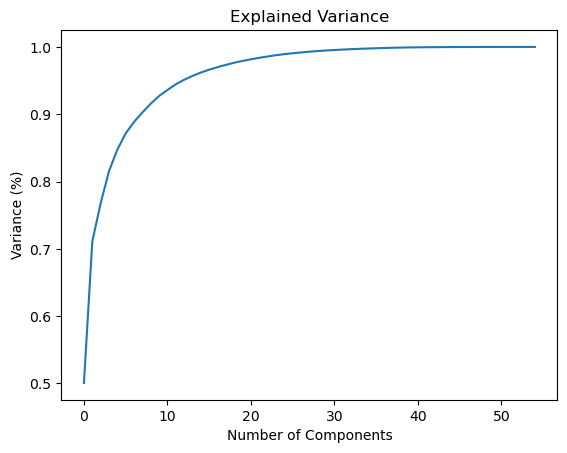

In [51]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_norm)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#CUMULATIVE SUM PLOT
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

Perform K-Means clustering

In [53]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [54]:
clusters

[3,
 3,
 3,
 1,
 3,
 0,
 1,
 2,
 4,
 3,
 3,
 2,
 0,
 1,
 1,
 4,
 2,
 3,
 2,
 0,
 0,
 2,
 0,
 0,
 4,
 1,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 4,
 2,
 4,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 4,
 2,
 0,
 2,
 3,
 2,
 2,
 4,
 4,
 1,
 3]

Make a new data frame by adding players' names and their cluster

In [55]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y' ,'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.482137,-1.287998,3,L. Messi
1,-1.180190,-0.894344,3,Cristiano Ronaldo
2,-1.335542,-1.460300,3,Neymar Jr
3,2.974839,-0.789651,1,J. Oblak
4,-1.207091,-1.249757,3,E. Hazard


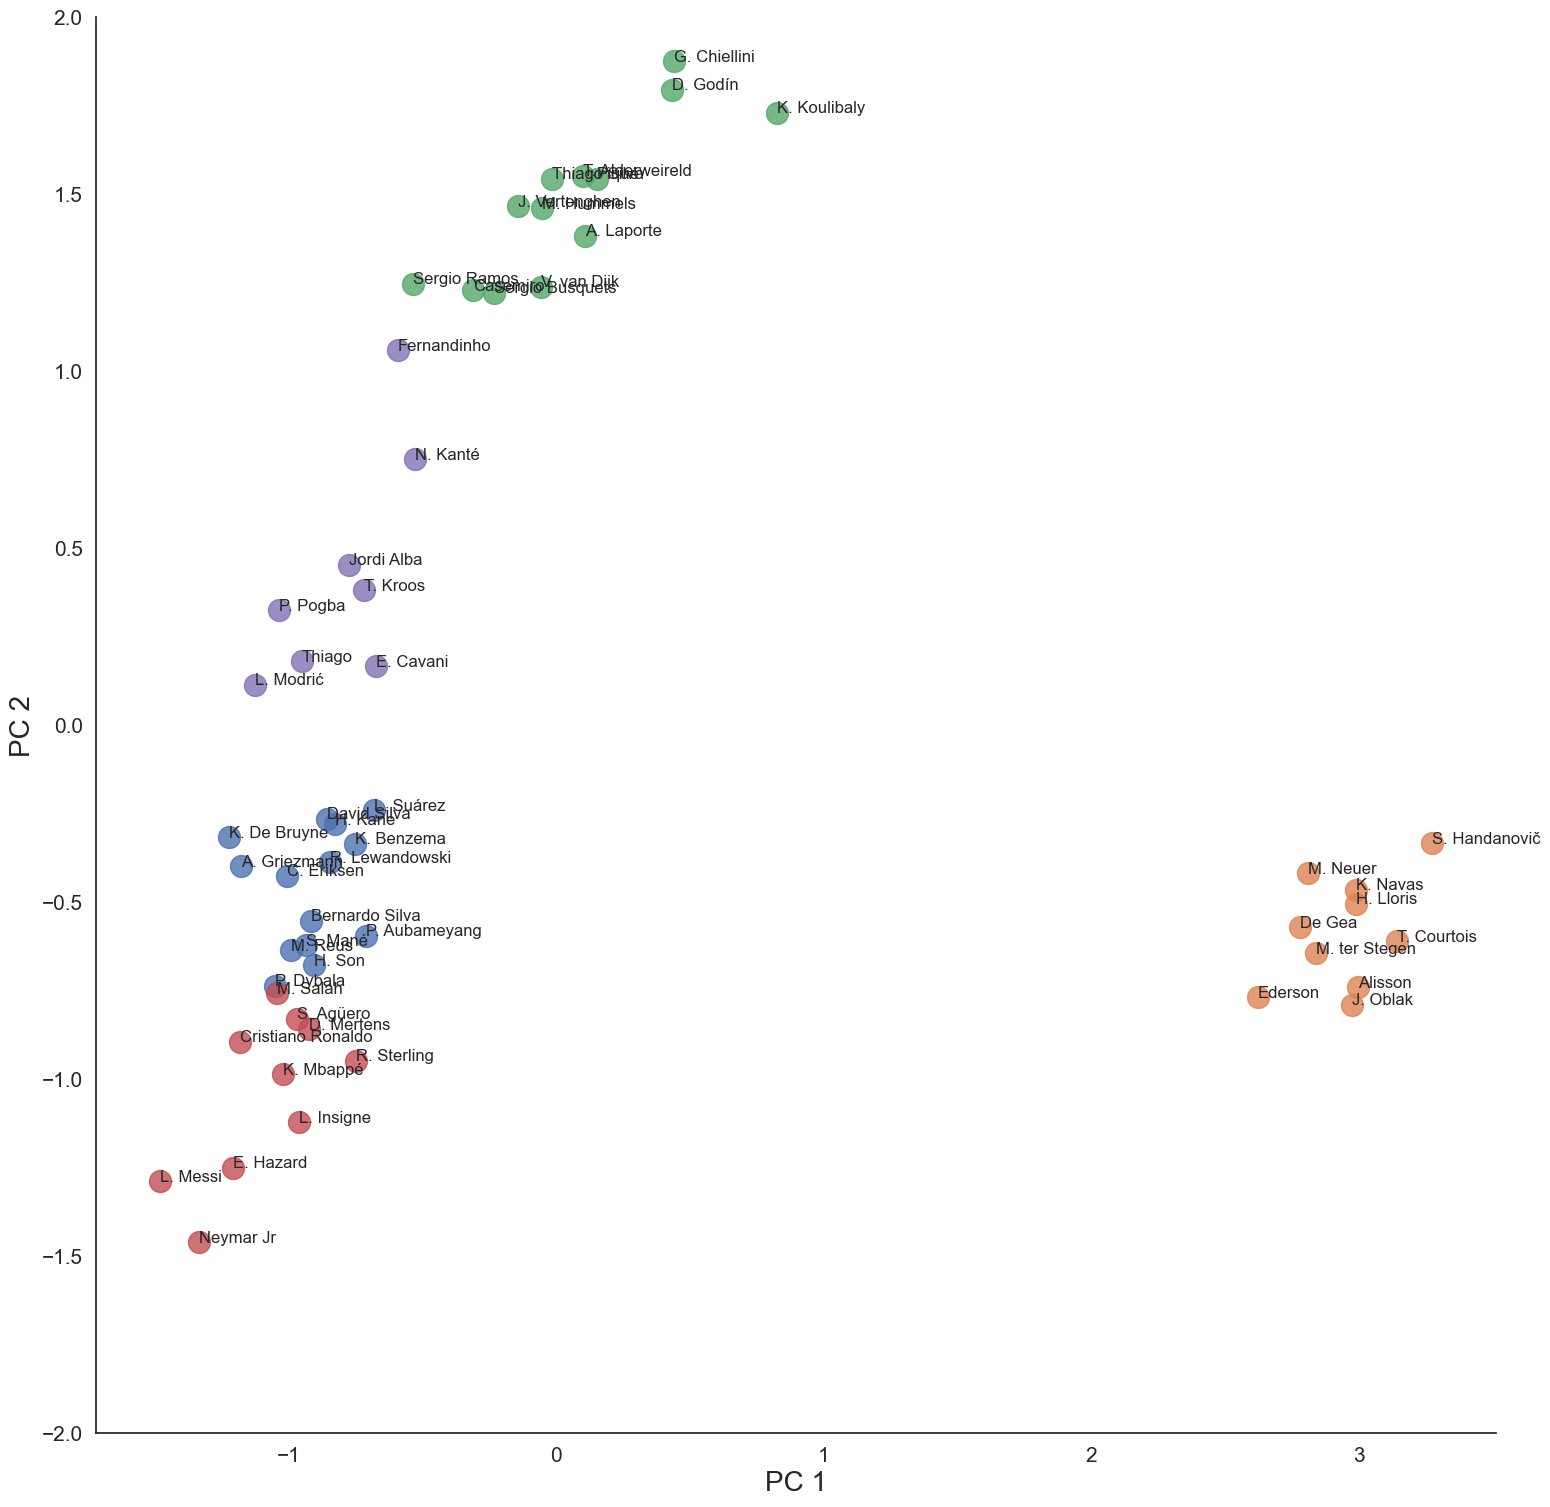

In [56]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False, height=15,
                   fit_reg=False,  scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

Evaluation metrics

In [57]:
label=kmeans.labels_
print(label)


from sklearn.metrics import silhouette_score
dl=['name']
score=silhouette_score(reduced.drop(dl, axis=1),label)
score #K=

[3 3 3 1 3 0 1 2 4 3 3 2 0 1 1 4 2 3 2 0 0 2 0 0 4 1 3 0 1 2 1 1 1 0 4 2 4
 0 0 0 2 0 2 0 4 2 0 2 3 2 2 4 4 1 3]


0.8325582357526151